In [1]:
from tensorflow.keras.preprocessing import image

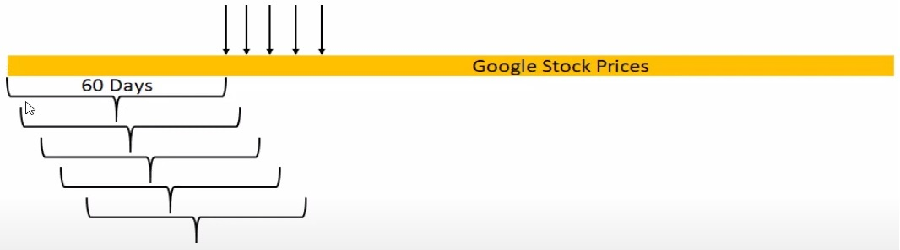

In [2]:
image1=image.load_img('data/googlestockprice.jpg',target_size=(250,900))
image1
#그 전 60일간의 데이터를 이용해 그 날의 Open price 예측

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
data=pd.read_csv('data/googlestockprice.csv',date_parser=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
4098,2020-11-27,1773.089966,1804.000000,1772.439941,1793.189941,1793.189941,884900
4099,2020-11-30,1781.183960,1788.064941,1755.000000,1760.739990,1760.739990,1823800
4100,2020-12-01,1774.369995,1824.829956,1769.369995,1798.099976,1798.099976,1739000
4101,2020-12-02,1798.099976,1835.650024,1789.473022,1827.949951,1827.949951,1222000


In [5]:
data_training=data[data['Date']<'2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3864,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900


In [6]:
data_test=data[data['Date']>='2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...,...
4098,2020-11-27,1773.089966,1804.000000,1772.439941,1793.189941,1793.189941,884900
4099,2020-11-30,1781.183960,1788.064941,1755.000000,1760.739990,1760.739990,1823800
4100,2020-12-01,1774.369995,1824.829956,1769.369995,1798.099976,1798.099976,1739000
4101,2020-12-02,1798.099976,1835.650024,1789.473022,1827.949951,1827.949951,1222000


In [7]:
train_data=data_training.drop(['Date','Adj Close'],axis=1)
train_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [8]:
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
train_data

array([[3.07080191e-04, 8.79291979e-04, 0.00000000e+00, 1.25356905e-04,
        5.43577404e-01],
       [6.89986513e-04, 2.78189186e-03, 1.73314228e-03, 3.15285500e-03,
        2.77885613e-01],
       [4.38255570e-03, 4.44951014e-03, 4.99709621e-03, 3.56690484e-03,
        2.22150736e-01],
       ...,
       [9.99726026e-01, 9.99642423e-01, 9.97425041e-01, 9.92923311e-01,
        1.24858240e-02],
       [9.89839738e-01, 9.90869803e-01, 9.85707361e-01, 9.80912804e-01,
        1.26372774e-02],
       [9.74702051e-01, 9.79457057e-01, 9.81925328e-01, 9.81583871e-01,
        1.15577171e-02]])

In [9]:
x_train=[]
y_train=[]

In [10]:
train_data.shape[0]

3869

In [11]:
for i in range(60,train_data.shape[0]):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i,0])  

In [12]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
x_train.shape , y_train.shape

((3809, 60, 5), (3809,))

### build LSTM

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
regressor=Sequential()

regressor.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=80,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=120,activation='relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
history=regressor.fit(x_train,y_train,epochs=15,batch_size=32)

Train on 3809 samples
Epoch 1/15
3809/3809 [==============================] - 43s 11ms/sample - loss: 0.0122
Epoch 2/15
3809/3809 [==============================] - 31s 8ms/sample - loss: 0.0020
Epoch 3/15
3809/3809 [==============================] - 33s 9ms/sample - loss: 0.0020
Epoch 4/15
3809/3809 [==============================] - 31s 8ms/sample - loss: 0.0016
Epoch 5/15
3809/3809 [==============================] - 28s 7ms/sample - loss: 0.0017
Epoch 6/15
3809/3809 [==============================] - 28s 7ms/sample - loss: 0.0016
Epoch 7/15
3809/3809 [==============================] - 29s 8ms/sample - loss: 0.0016
Epoch 8/15
3809/3809 [==============================] - 29s 8ms/sample - loss: 0.0015
Epoch 9/15
3809/3809 [==============================] - 29s 8ms/sample - loss: 0.0013
Epoch 10/15
3809/3809 [==============================] - 29s 8ms/sample - loss: 0.0014
Epoch 11/15
3809/3809 [==============================] - 29s 7ms/sample - loss: 0.0013
Epoch 12/15
3809/3809 [======

### prepare test dataset

In [19]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [20]:
#test data 값 예측할려면 test data 기준 60일 이전 data부터 필요

In [21]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3809,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
3810,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
3811,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3812,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
3813,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
3814,2019-10-14,1212.339966,1226.329956,1211.760010,1217.140015,1217.140015,867500
3815,2019-10-15,1220.400024,1247.329956,1220.400024,1243.010010,1243.010010,1381700
3816,2019-10-16,1241.170044,1254.739990,1238.449951,1243.640015,1243.640015,1094600
3817,2019-10-17,1250.930054,1263.324951,1249.939941,1253.069946,1253.069946,952400
3818,2019-10-18,1253.459961,1258.890015,1241.079956,1245.489990,1245.489990,1352800


In [22]:
past_60_days=data_training.tail(60)

In [23]:
df=past_60_days.append(data_test,ignore_index=True)
df=df.drop(['Date','Adj Close'],axis=1)
df

,Open,High,Low,Close,Volume
0,1204.400024,1218.203979,1203.750000,1207.680054,842900
1,1197.589966,1206.079956,1189.010010,1189.130005,1039300
2,1199.349976,1208.349976,1197.630005,1202.310059,867700
3,1198.579956,1215.000000,1197.339966,1208.670044,846600
4,1222.209961,1228.390015,1213.739990,1215.449951,1272700
...,...,...,...,...,...
289,1773.089966,1804.000000,1772.439941,1793.189941,884900
290,1781.183960,1788.064941,1755.000000,1760.739990,1823800
291,1774.369995,1824.829956,1769.369995,1798.099976,1739000
292,1798.099976,1835.650024,1789.473022,1827.949951,1222000


In [24]:
inputs=scaler.transform(df)
inputs

array([[0.87902801, 0.88831029, 0.88587359, 0.88295285, 0.01011709],
       [0.87384509, 0.87908573, 0.87457744, 0.8688071 , 0.01249673],
       [0.87518458, 0.88081287, 0.88118346, 0.87885784, 0.01041758],
       ...,
       [1.31281487, 1.3498615 , 1.31934231, 1.33319048, 0.02097449],
       [1.33087503, 1.35809395, 1.33474847, 1.35595324, 0.01471037],
       [1.35059437, 1.36688171, 1.36017401, 1.35505345, 0.01476974]])

In [25]:
inputs.shape

(294, 5)

In [26]:
x_test=[]
y_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [27]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [28]:
x_test.shape,y_test.shape

((234, 60, 5), (234,))

In [40]:
y_pred=regressor.predict(x_test)

In [41]:
y_pred

array([[0.92281604],
       [0.92363083],
       [0.9242872 ],
       [0.9248854 ],
       [0.92559385],
       [0.9265479 ],
       [0.92788637],
       [0.9297023 ],
       [0.93203735],
       [0.93486315],
       [0.938098  ],
       [0.94167316],
       [0.94556856],
       [0.9497769 ],
       [0.95429426],
       [0.9590595 ],
       [0.96394575],
       [0.96861875],
       [0.97285926],
       [0.97658896],
       [0.9797493 ],
       [0.98233145],
       [0.9844477 ],
       [0.98610586],
       [0.98735005],
       [0.9882951 ],
       [0.98908526],
       [0.9898907 ],
       [0.9909106 ],
       [0.9922744 ],
       [0.9940301 ],
       [0.9961616 ],
       [0.9986214 ],
       [1.0013545 ],
       [1.0042593 ],
       [1.007134  ],
       [1.0095121 ],
       [1.0110118 ],
       [1.0113889 ],
       [1.0103685 ],
       [1.0077447 ],
       [1.0036987 ],
       [0.99857986],
       [0.99277705],
       [0.9865141 ],
       [0.97981435],
       [0.97248846],
       [0.964

In [31]:
#scale 되어있는 값을 되돌려놔야함

In [32]:
scaler.scale_

array([7.61069658e-04, 7.60849739e-04, 7.66360329e-04, 7.62571888e-04,
       1.21162775e-08])

In [33]:
scale=1/7.61069658e-04
scale

1313.940175499678

In [34]:
y_pred=y_pred*scale
y_test=y_test*scale

In [35]:
y_pred

array([[1212.525 ],
       [1213.5957],
       [1214.4581],
       [1215.2441],
       [1216.1749],
       [1217.4285],
       [1219.1871],
       [1221.5732],
       [1224.6414],
       [1228.3542],
       [1232.6047],
       [1237.3022],
       [1242.4205],
       [1247.9501],
       [1253.8856],
       [1260.1467],
       [1266.567 ],
       [1272.7072],
       [1278.2789],
       [1283.1794],
       [1287.332 ],
       [1290.7247],
       [1293.5054],
       [1295.6841],
       [1297.3188],
       [1298.5607],
       [1299.5989],
       [1300.6571],
       [1301.9972],
       [1303.7892],
       [1306.0961],
       [1308.8967],
       [1312.1288],
       [1315.7198],
       [1319.5367],
       [1323.3138],
       [1326.4385],
       [1328.409 ],
       [1328.9045],
       [1327.5637],
       [1324.1162],
       [1318.8   ],
       [1312.0742],
       [1304.4497],
       [1296.2205],
       [1287.4175],
       [1277.7916],
       [1267.3867],
       [1256.2693],
       [1244.2186],


In [36]:
y_test

array([1292.14024849, 1298.45018449, 1300.59019949, 1348.53014051,
       1342.67015551, 1371.16014552, 1378.15025852, 1386.72020453,
       1389.60020953, 1380.80016053, 1398.03014053, 1413.50023354,
       1429.71019454, 1441.59019955, 1438.23021455, 1444.18016555,
       1381.59019953, 1393.59019953, 1409.39024854, 1390.55016053,
       1419.49022354, 1412.59019954, 1407.66014554, 1413.01024354,
       1400.92015553, 1417.89024854, 1424.91014554, 1462.40025856,
       1465.07017956, 1463.28014056, 1466.19017556, 1465.59019956,
       1475.66014556, 1472.59019956, 1458.62022855, 1376.70018452,
       1383.59019953, 1346.73021451, 1312.6502585 , 1228.09019947,
       1302.2001845 , 1350.01024351, 1309.8201795 , 1300.79015049,
       1227.65025847, 1155.89024844, 1210.59019946, 1200.29015046,
       1076.59019941, 1129.59019943, 1046.5901994 , 1043.7001844 ,
       1007.10020938, 1043.6402484 , 1086.31017041, 1011.91014538,
       1054.3602194 , 1077.06017041, 1062.3902484 , 1076.26024

### visualization

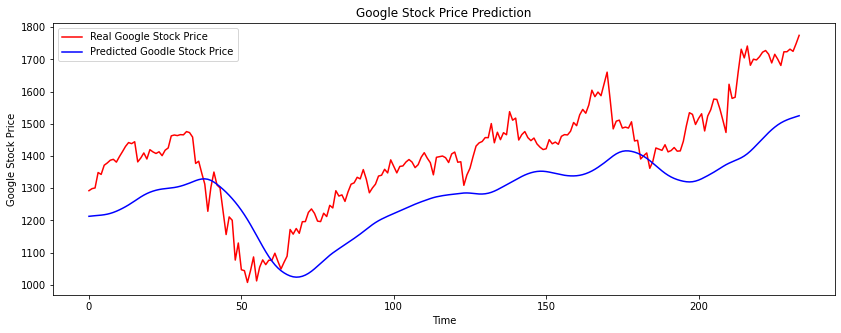

In [37]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color='red',label='Real Google Stock Price')
plt.plot(y_pred,color='blue',label='Predicted Goodle Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()